**Multiclass classification using the Reuters dataset**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [9]:
# Decode newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
train_labels[10]

3

In [12]:
# Encoding the data
# vectorize data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
# one-hot encode the labels
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [17]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [19]:
# define the model
# 46 output classes, dimensionality is much higher
# going with 64 units

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# for every input sample, the network will produce a 46-dimensional output vector
# output[i] is the probability that the sample belongs to class i. 
# the 46 scores will sum to 1, by using softmax activation


In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# set aside validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [26]:
# train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 75ms/step - loss: 3.2132 - accuracy: 0.4176 - val_loss: 1.8152 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.5456 - accuracy: 0.7020 - val_loss: 1.3161 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.1039 - accuracy: 0.7715 - val_loss: 1.1460 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8542 - accuracy: 0.8230 - val_loss: 1.0461 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6821 - accuracy: 0.8611 - val_loss: 0.9850 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5383 - accuracy: 0.8915 - val_loss: 0.9358 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4194 - accuracy: 0.9164 - val_loss: 0.9834 - val_accuracy: 0.7940
Epoch 8/20
16

In [27]:
# starts to overfit around 8 or 9 epochs

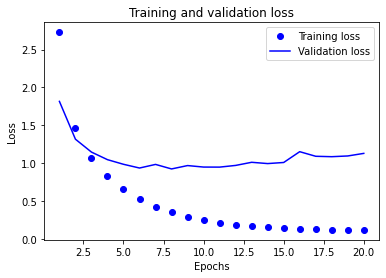

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

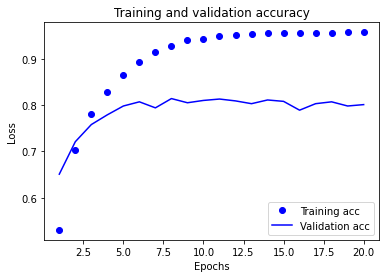

In [34]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
# retrain with 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 62ms/step - loss: 2.9856 - accuracy: 0.4329 - val_loss: 1.6326 - val_accuracy: 0.6460
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.4397 - accuracy: 0.6942 - val_loss: 1.2742 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 1s 46ms/step - loss: 1.0447 - accuracy: 0.7764 - val_loss: 1.1077 - val_accuracy: 0.7700
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.8188 - accuracy: 0.8214 - val_loss: 1.0183 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 1s 49ms/step - loss: 0.6286 - accuracy: 0.8661 - val_loss: 0.9617 - val_accuracy: 0.8070
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4970 - accuracy: 0.9034 - val_loss: 0.9199 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.4138 - accuracy: 0.9167 - val_loss: 0.8854 - val_accuracy: 0.8220
Epoch 8/9
16/16 [===

In [36]:
results

[0.9831912517547607, 0.7885128855705261]

In [37]:
# retrain with larger layers, 128 units
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 2s 86ms/step - loss: 2.7879 - accuracy: 0.4381 - val_loss: 1.3895 - val_accuracy: 0.6900
Epoch 2/20
16/16 [==============================] - 1s 75ms/step - loss: 1.1461 - accuracy: 0.7548 - val_loss: 1.1250 - val_accuracy: 0.7480
Epoch 3/20
16/16 [==============================] - 1s 75ms/step - loss: 0.8070 - accuracy: 0.8281 - val_loss: 0.9960 - val_accuracy: 0.7790
Epoch 4/20
16/16 [==============================] - 1s 74ms/step - loss: 0.5990 - accuracy: 0.8721 - val_loss: 0.9141 - val_accuracy: 0.8050
Epoch 5/20
16/16 [==============================] - 1s 72ms/step - loss: 0.4387 - accuracy: 0.9075 - val_loss: 0.8653 - val_accuracy: 0.8190
Epoch 6/20
16/16 [==============================] - 1s 75ms/step - loss: 0.3186 - accuracy: 0.9300 - val_loss: 0.8728 - val_accuracy: 0.8170
Epoch 7/20
16/16 [==============================] - 1s 75ms/step - loss: 0.2449 - accuracy: 0.9471 - val_loss: 0.9720 - val_accuracy: 0.7830
Epoch 8/20
16

In [39]:
# not any better
# let's try one layer, 64 units
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 3.1006 - accuracy: 0.4637 - val_loss: 1.8461 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.5878 - accuracy: 0.7077 - val_loss: 1.3700 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.1238 - accuracy: 0.7811 - val_loss: 1.1547 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8671 - accuracy: 0.8292 - val_loss: 1.0267 - val_accuracy: 0.7940
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6877 - accuracy: 0.8660 - val_loss: 0.9459 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5602 - accuracy: 0.8918 - val_loss: 0.8940 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4456 - accuracy: 0.9101 - val_loss: 0.8634 - val_accuracy: 0.8250
Epoch 8/20
16

In [40]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/10
16/16 [==============================] - 1s 57ms/step - loss: 3.1262 - accuracy: 0.4641 - val_loss: 1.8992 - val_accuracy: 0.6450
Epoch 2/10
16/16 [==============================] - 1s 46ms/step - loss: 1.6336 - accuracy: 0.7114 - val_loss: 1.3917 - val_accuracy: 0.7080
Epoch 3/10
16/16 [==============================] - 1s 47ms/step - loss: 1.1398 - accuracy: 0.7868 - val_loss: 1.1570 - val_accuracy: 0.7750
Epoch 4/10
16/16 [==============================] - 1s 45ms/step - loss: 0.8751 - accuracy: 0.8273 - val_loss: 1.0203 - val_accuracy: 0.7990
Epoch 5/10
16/16 [==============================] - 1s 46ms/step - loss: 0.6943 - accuracy: 0.8669 - val_loss: 0.9468 - val_accuracy: 0.8030
Epoch 6/10
16/16 [==============================] - 1s 46ms/step - loss: 0.5608 - accuracy: 0.8962 - val_loss: 0.8878 - val_accuracy: 0.8170
Epoch 7/10
16/16 [==============================] - 1s 46ms/step - loss: 0.4544 - accuracy: 0.9127 - val_loss: 0.8575 - val_accuracy: 0.8230
Epoch 8/10
16

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 1s 58ms/step - loss: 3.1852 - accuracy: 0.2877 - val_loss: 1.7202 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.5606 - accuracy: 0.6596 - val_loss: 1.3205 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.1155 - accuracy: 0.7482 - val_loss: 1.1463 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8659 - accuracy: 0.8025 - val_loss: 1.0464 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6991 - accuracy: 0.8452 - val_loss: 0.9715 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5436 - accuracy: 0.8814 - val_loss: 1.0409 - val_accuracy: 0.7580
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4262 - accuracy: 0.9070 - val_loss: 0.9124 - val_accuracy: 0.8100
Epoch 8/20
16

In [42]:
# looks like models with one hidden layer, 64 units had highest accuracy